In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from itertools import chain

vims_wave = np.loadtxt('vims_wave.txt')
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
year_list = []
for number in new_array:
    new_string = 'df'+number+' = '+'pd.read_pickle("c_data/data'+number+'.pkl")'
    exec(new_string)
    year = number[1:3]+'-'+number[3:5]
    year_list.append(year)

def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = list(chain(range(29,35),range(46,60),range(78,96),range(102,106)))

window = list(range(56,83))

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

# ! See if you can improve this for next time you try to fit a Gaussian
# def gaussian_fit(spectrum):
#     my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2,.05])
#     return my_fit,_

def shift_ret(spectrum):
    my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2,.05])
    return my_fit[1]

def gaussian_ret(spectrum):
    my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2,.05])
    return my_fit

mean_list = []
spectra_list = []
for number in new_array:
    new_string = 'spectra'+number+' = '+'custom_fit(df'+number+')'
    exec(new_string)
    spectrum = 'spectra'+number
    new_spectrum = locals()[spectrum]
    spectra_list.append(new_spectrum)
    new_mean = shift_ret(new_spectrum)
    mean_list.append(new_mean)

C:\Users\lucas\AppData\Local\Temp/ipykernel_30120/983839714.py:18: RuntimeWarning: overflow encountered in power
  return a*np.power(x,b)
C:\Users\lucas\AppData\Local\Temp/ipykernel_30120/983839714.py:18: RuntimeWarning: overflow encountered in multiply
  return a*np.power(x,b)


In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,2,figsize=(10,4),facecolor='black')
fig.suptitle('Powerlaw-fitted Spectra vs Gaussian fit to the two µm window',color='white',fontname='Georgia')
color = plt.cm.rainbow(np.linspace(0,1,7))
for i,c in zip(range(7),color):
    y = spectra_list[i]
    my_fit,_ = curve_fit(gaussian,vims_wave[window],y[window],p0=[.05,2,.05])
    axs[0].plot(vims_wave,y,c=c)
    axs[1].plot(vims_wave,gaussian(vims_wave,*my_fit),'--',c=c)
axs[1].set_ylim([-.02,.135])
for ax in fig.get_axes():
    ax.tick_params(axis='x',colors='white')
    ax.tick_params(axis='y',colors='white')
    ax.set_xlabel('Wavelength (µm)',color='white',fontname='Georgia')
    ax.set_ylabel('I/F',color='white',fontname='Georgia')

fig.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,2,figsize=(10,4),facecolor='black')
fig.suptitle('Powerlaw-fitted Spectra vs Gaussian fit to the two µm window',color='white',fontname='Georgia')
color = plt.cm.rainbow(np.linspace(0,1,7))
for i,c in zip(range(7),color):
    y = spectra_list[i]
    my_fit,_ = curve_fit(gaussian,vims_wave[window],y[window],p0=[.05,2,.05])
    axs[0].plot(vims_wave,y,c=c)
    axs[1].plot(vims_wave,gaussian(vims_wave,*my_fit),'--',c=c)
axs[1].set_ylim([-.02,.135])
for ax in fig.get_axes():
    ax.tick_params(axis='x',colors='white')
    ax.tick_params(axis='y',colors='white')
    ax.set_xlabel('Wavelength ($\mu m$)',color='white',fontname='Georgia')
    ax.set_ylabel('I/F',color='white',fontname='Georgia') #$\mu$

fig.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,3,figsize=(20,5),facecolor='black')
fig.suptitle('Powerlaw-fitted Spectra and Shifting From 2004-2017',color='white',fontname='Georgia',fontweight='bold',fontsize=20)
color = plt.cm.nipy_spectral(np.linspace(0.05,0.95,7)) # Makes an array of seven different colors with RGB values
for spectra,c,i in zip(spectra_list,color,range(7)):
    y = spectra
    my_fit,_ = curve_fit(gaussian,vims_wave[window],y[window],p0=[.05,2,.05])
    if i == 6: #Only uses legend with the red color lines
        axs[0].plot(vims_wave,y,c=c, label='Spectrum')
        axs[0].plot(vims_wave,gaussian(vims_wave,*my_fit),'--',c=c, label='Gaussian Fit')
    else:
        axs[0].plot(vims_wave,y,c=c)
        axs[0].plot(vims_wave,gaussian(vims_wave,*my_fit),'--',c=c)
    
axs[0].set_xlim([1.9,2.2])
axs[0].set_ylim([0,0.02])


x = np.linspace(0,14,7)
y = mean_list
p = np.polyval(np.polyfit(x,y,1),x)
axs[1].plot(x,y,label='Measured Shift')
axs[1].plot(x,p,c='r',label='Fit Line')

axs[0].set_title('Spectrum',color='white',fontname='Georgia',fontsize=18)
axs[1].set_title('Shift',color='white',fontname='Georgia',fontsize=18)
axs[2].set_title('Shift with Gaussians',color='white',fontname='Georgia',fontsize=18)

# Plot shifting in two micron window
for spectrum,c,number in zip(spectra_list,color,new_array):
    string = number[1:3]+'-'+number[3:5]
    my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2,.05])
    x_fit = np.linspace(1.98,2.08,1000)
    y_fit = gaussian(x_fit,*(.05,my_fit[1],.01))
    axs[2].plot(x_fit,y_fit,c=c,label=string)

axs[2].set_xlim(2.0,2.06)
axs[2].set_ylim(0,0.055)

for ax in fig.get_axes():
    ax.tick_params(axis='x',colors='white')
    ax.tick_params(axis='y',colors='white')

#Labels for Axes
axs[0].set_xlabel('Wavelength ($\mu m$)',color='white',fontname='Georgia')
axs[0].set_ylabel('I/F',color='white',fontname='Georgia')
axs[1].set_xlabel('Spectra #',color='white',fontname='Georgia')
axs[1].set_ylabel('$\mu$m',color='white',fontname='Georgia')
axs[1].set_xticks(ticks=np.linspace(0,14,7),labels=year_list)
axs[2].set_xlabel('Wavelength ($\mu m$)',color='white',fontname='Georgia')
axs[2].set_ylabel('I/F',color='white',fontname='Georgia')
# axs[2].set_xticks(axis='x',ticks=np.arange(1.8,2.3,.1))

# L = [axs[0].legend(shadow=True),axs[1].legend(shadow=True),axs[2].legend(shadow=True)]
for ax in axs:
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    L = ax.legend(frameon=False)
    for text in L.get_texts():
        text.set_color('white')
    ax.set_facecolor('k')
    ax.tick_params(labelsize=14)
# for i in range(len(L)):
#     plt.setp(L[i].texts,family='Georgia')

fig.tight_layout(pad=3.0)
plt.show()
    

In [ ]:
%matplotlib inline
plt.style.use("dark_background")
fig,ax = plt.subplots(figsize=(12,8),dpi=300)
plt.title('Powerlaw-fitted Spectra and VIMS Shifting From 2004-2017',fontname='Georgia',fontweight='bold',fontsize=20)
color = plt.cm.nipy_spectral(np.linspace(0.05,0.95,7))
for spectrum,c,number in zip(spectra_list,color,new_array):
    string = '20'+number[1:3]+'-'+'20'+number[3:5]
    my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2,.05])
    x_fit = np.linspace(1.98,2.08,1000)
    y_fit = gaussian(x_fit,*(.05,my_fit[1],.01))
    ax.plot(x_fit,y_fit,c=c,label=string)
ax.set_xlim(2.0,2.06)
ax.set_xticks(np.arange(2.01,2.06,.01))
ax.set_xlabel('Wavelength ($\mu m$)',color='white',fontname='Georgia')
ax.set_ylim(0,0.055)
ax.set_yticks(np.arange(0.01,0.06,0.01))
ax.set_ylabel('I/F',color='white',fontname='Georgia')

for spine in ax.spines.values():
    spine.set_edgecolor('white')
    L = ax.legend(frameon=False)
    for text in L.get_texts():
        text.set_color('white')
    ax.tick_params(labelsize=14)

plt.show()

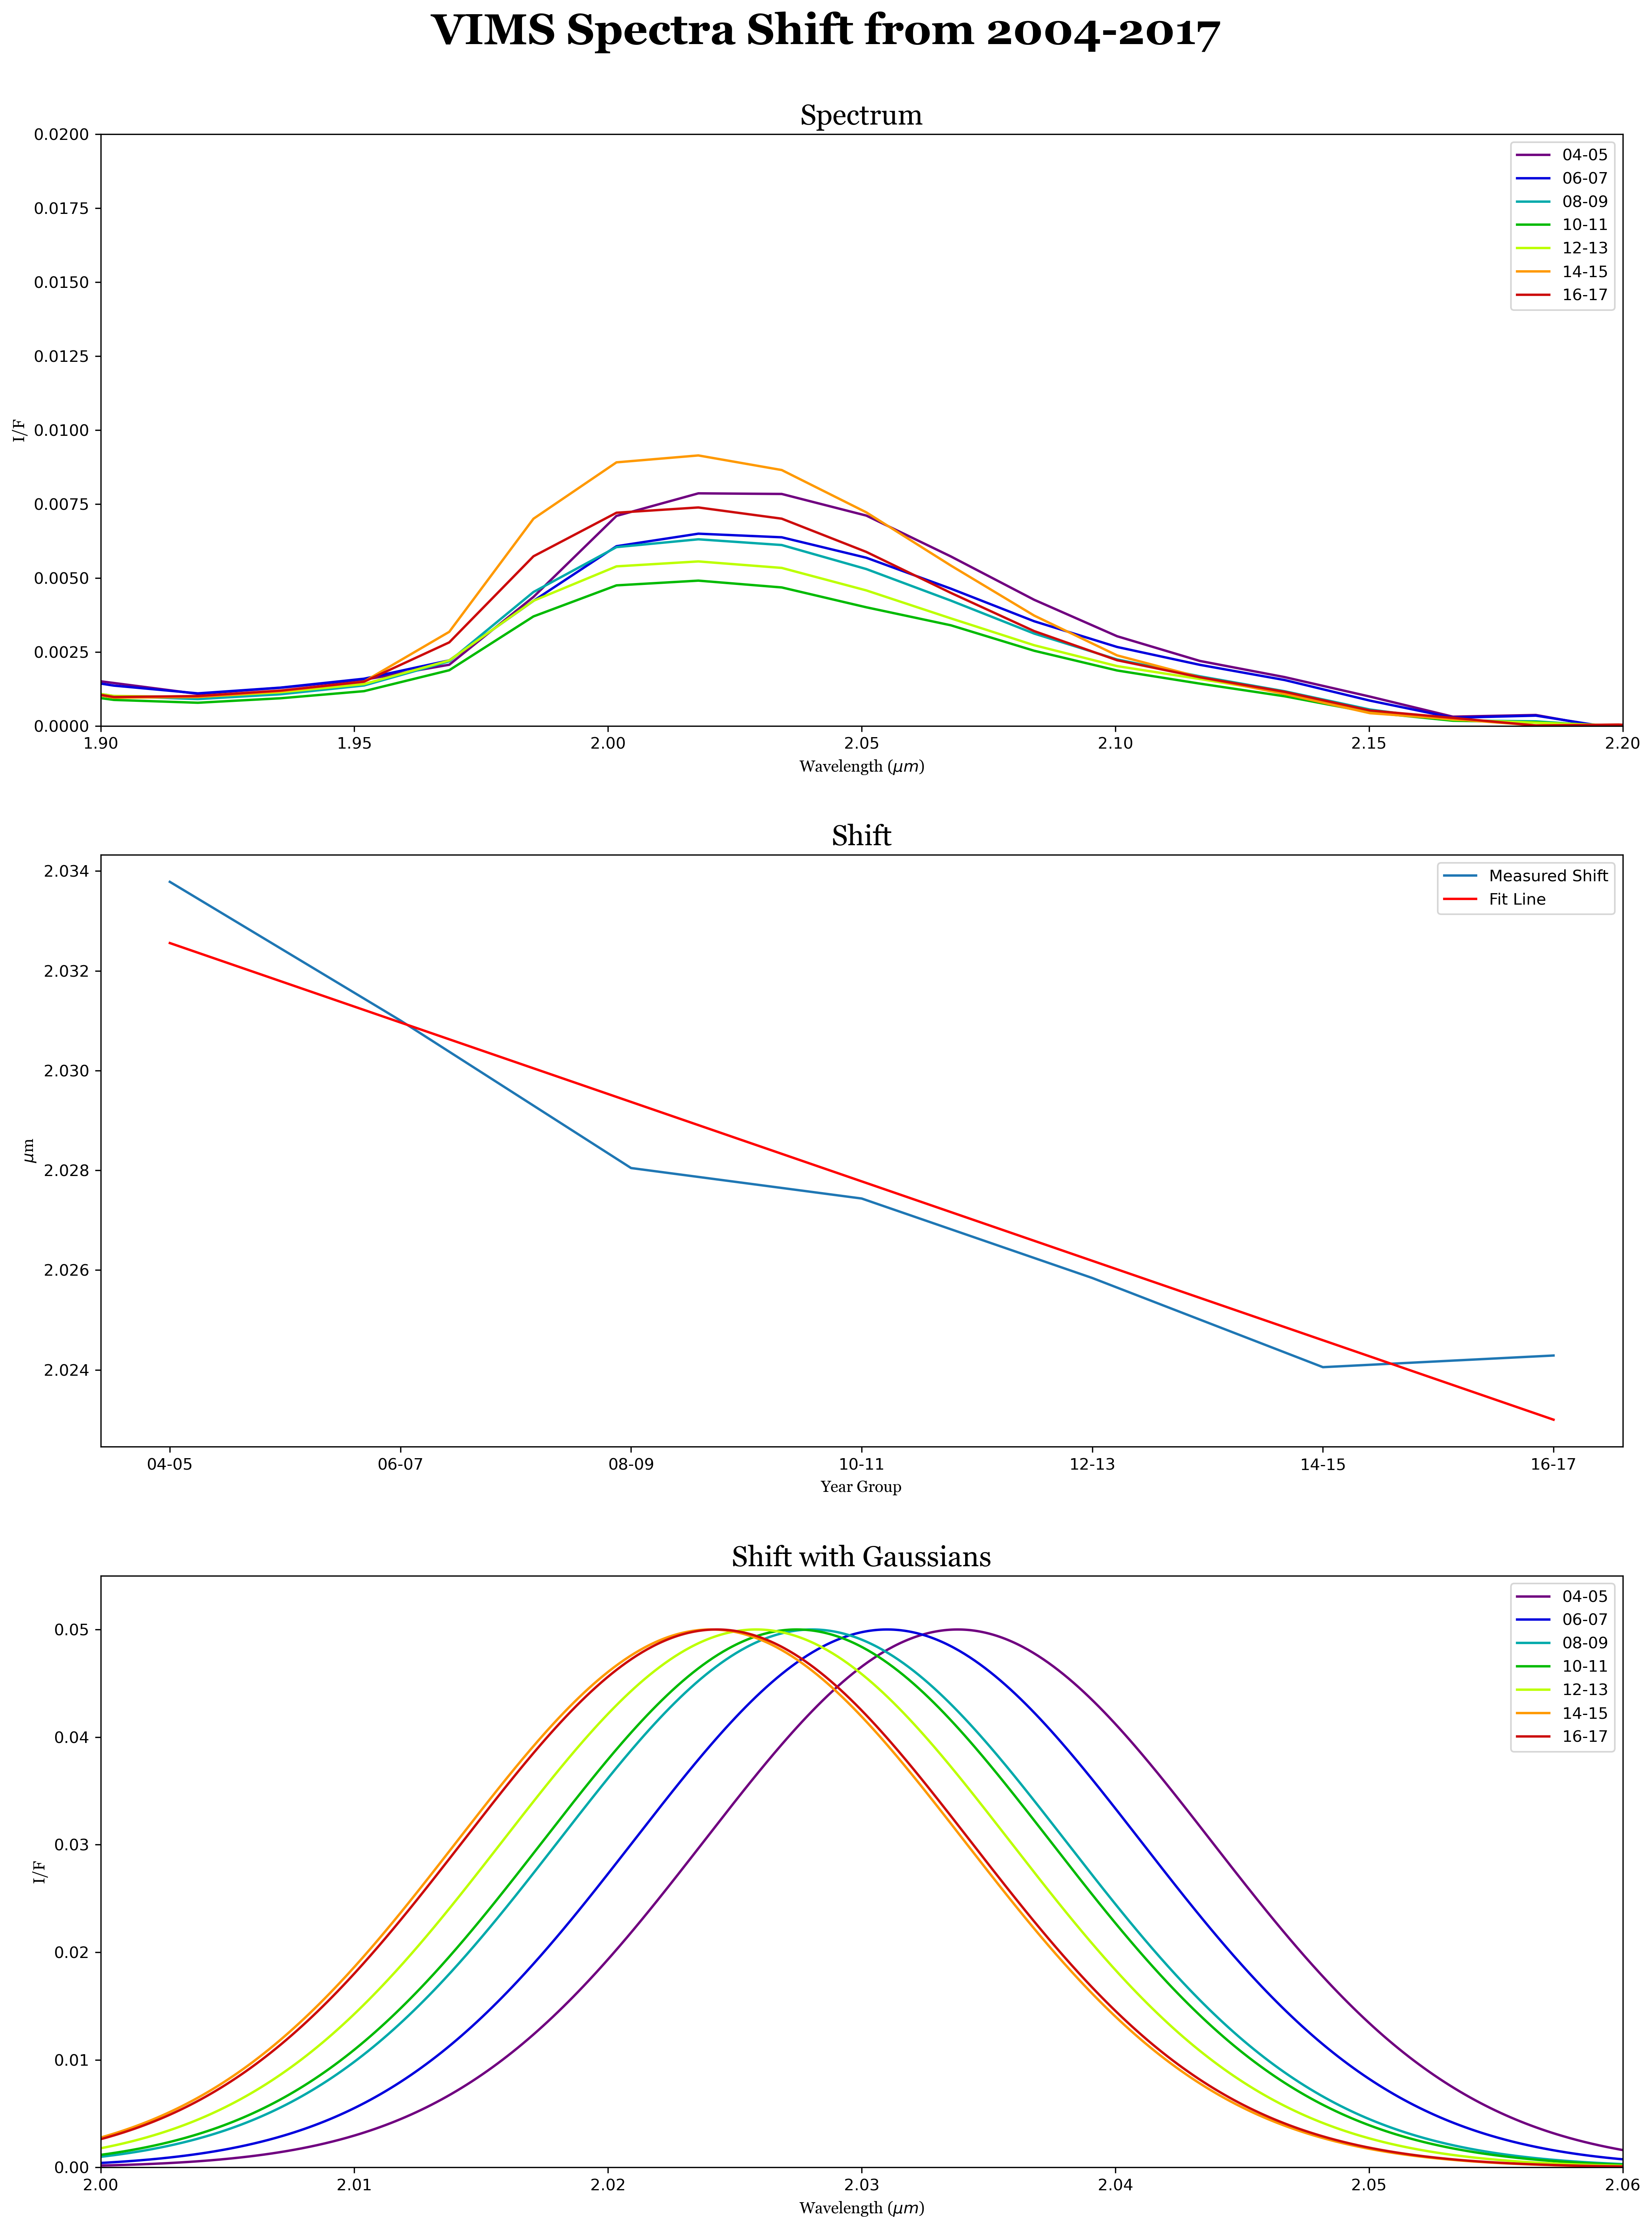

In [15]:
%matplotlib inline
fig, axs = plt.subplots(3,1,figsize=(15,20),facecolor='white',dpi=300)
fig.suptitle('VIMS Spectra Shift from 2004-2017',fontname='Georgia',fontweight='bold',fontsize=27)
color = plt.cm.nipy_spectral(np.linspace(0.05,0.95,7)) # Makes an array of seven different colors with RGB values
for spectra,c,number in zip(spectra_list,color,new_array):
    y = spectra
    string = number[1:3]+'-'+number[3:5]
    my_fit,_ = curve_fit(gaussian,vims_wave[window],y[window],p0=[.05,2,.05])
    axs[0].plot(vims_wave,y,c=c,label=string)
    
axs[0].set_xlim([1.9,2.2])
axs[0].set_ylim([0,0.02])


x = np.linspace(0,14,7)
y = mean_list
p = np.polyval(np.polyfit(x,y,1),x)
axs[1].plot(x,y,label='Measured Shift')
axs[1].plot(x,p,c='r',label='Fit Line')

axs[0].set_title('Spectrum',fontname='Georgia',fontsize=18)
axs[1].set_title('Shift',fontname='Georgia',fontsize=18)
axs[2].set_title('Shift with Gaussians',fontname='Georgia',fontsize=18)

# Plot shifting in two micron window
for spectrum,c,number in zip(spectra_list,color,new_array):
    string = number[1:3]+'-'+number[3:5]
    my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2.025,.05])
    x_fit = np.linspace(1.98,2.08,1000)
    y_fit = gaussian(x_fit,*(.05,my_fit[1],.01))
    axs[2].plot(x_fit,y_fit,c=c,label=string)

axs[2].set_xlim(2.0,2.06)
axs[2].set_ylim(0,0.055)

#Labels for Axes
axs[0].set_xlabel('Wavelength ($\mu m$)',fontname='Georgia')
axs[0].set_ylabel('I/F',fontname='Georgia')
axs[1].set_xlabel('Year Group',fontname='Georgia')
axs[1].set_ylabel('$\mu$m',fontname='Georgia')
axs[1].set_xticks(ticks=np.linspace(0,14,7),labels=year_list)
axs[2].set_xlabel('Wavelength ($\mu m$)',fontname='Georgia')
axs[2].set_ylabel('I/F',fontname='Georgia')
# axs[2].set_xticks(axis='x',ticks=np.arange(1.8,2.3,.1))


for ax in axs:
    ax.legend()

plt.savefig('gaussian_wbg.png')
fig.tight_layout(pad=3.0)
plt.show()
    